# KMeans

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\anand\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv(r"D:\My Downloads\Mall_Customers_dataset.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


 lets try to group peopel based on Annual income and spending score and propse them different offers/discounts/gift vouchers
 Since it is a clustering, we will not have target/y column. Lets consider Annual income and spending score

In [5]:
df.iloc[:, 3:]   # select all the rows  and all the columns from index number 3 till end

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
x = df.iloc[:, 3:] 

In [7]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


At the beginning we are not aware that how many clusters we have to create. We have to do the elbow (WCSS) plot from 
elbow plot we will come to know how many clusters we need to create

In [9]:
from sklearn.cluster import KMeans

C:\Users\anand\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\anand\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\anand\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
# First we need to find the value of K

wcss = []

for i in range(1,15):   # lets try to test till 20 clusters
    kmean = KMeans(n_clusters=i , init = 'k-means++' ,  random_state = 30)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    

In [11]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 25079.766962115882,
 21850.16528258562,
 19787.67055496685,
 18004.8218348464,
 16372.662146832501,
 14349.754043342282,
 13408.710180900964]

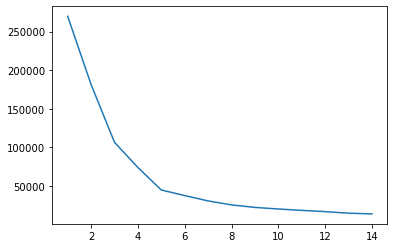

In [12]:
plt.plot(range(1,15) , wcss)

We can use k = 5

In [14]:
kmean1 = KMeans(n_clusters=5, init = 'k-means++' , random_state=30)
kmean1.fit_predict(x)   # we can see 5 cluster no are assigned to all the datapoints

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [15]:
# lets add a new column 'cluster number' to x , so that we can which cluster each data point belongs to

x['Cluster number'] = kmean1.fit_predict(x) 

In [16]:
x

,Annual Income (k$),Spending Score (1-100),Cluster number
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


In [17]:
# extract all the data that belongs to cluster no 4

x['Cluster number'] == 4

0       True
1      False
2       True
3      False
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Cluster number, Length: 200, dtype: bool

In [19]:
x[x['Cluster number'] == 4]  # we can see some similarity between the columns that are having cluster no 4

,Annual Income (k$),Spending Score (1-100),Cluster number
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [20]:
# cluster no 3

x[x['Cluster number'] == 3]

,Annual Income (k$),Spending Score (1-100),Cluster number
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3


In [21]:
x[x['Cluster number'] == 2]

,Annual Income (k$),Spending Score (1-100),Cluster number
43,39,61,2
46,40,55,2
47,40,47,2
48,40,42,2
49,40,42,2
...,...,...,...
121,67,40,2
122,69,58,2
126,71,35,2
132,72,34,2


In [22]:
x[x['Cluster number'] == 1]

,Annual Income (k$),Spending Score (1-100),Cluster number
124,70,29,1
128,71,11,1
130,71,9,1
134,73,5,1
136,73,7,1
138,74,10,1
140,75,5,1
144,77,12,1
146,77,36,1
148,78,22,1


In [23]:
x[x['Cluster number'] == 0]

,Annual Income (k$),Spending Score (1-100),Cluster number
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0
141,75,93,0


now we know the range of Annual income and Spending score in each cluser, we can say we have done the grouping of the ppl
Lets do a prediction of new data

Annual income = 55 and spending score = 31  - this data belongs to which cluster?

In [26]:
kmean1.predict([[55,31]])   # predicting correctly

array([2])

# MiniBacth KMeans

In [27]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)

minibatch_kmeans.fit(x)

MiniBatchKMeans(n_clusters=5)

In [31]:
minibatch_kmeans.predict([[55,31,3]])

array([0])

# DB SCAN alog

In [32]:
from sklearn.cluster import DBSCAN


In [34]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [35]:
dbscan.fit(x)

DBSCAN()

In [36]:
x

,Annual Income (k$),Spending Score (1-100),Cluster number
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


In [37]:
dbscan.labels_  # we can see, DB Scan has created only one cluster. 

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [38]:
# lets change some of the parameters and try to build DBscan model again

dbscan = DBSCAN(eps=0.1, min_samples=5)

dbscan.fit(x)

DBSCAN(eps=0.1)

In [39]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [ ]:
# it is still giving the same result. Lets consider only Annual income and Spending Score

In [40]:
x = df.iloc[:, 3:] 

In [41]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [52]:
dbscan = DBSCAN(eps=1, min_samples=3)

dbscan.fit(x)

DBSCAN(eps=1, min_samples=3)

In [53]:
dbscan.labels_  # now its  giving few other cluster 0, 2,3,4 one cluster

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1,  1,  2,  2,  1,  2, -1,  2,  2, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  3, -1,  4, -1, -1,  3,  4,  3,  4, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  5, -1,
       -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [54]:
# total no of clusters. Here -1 is noise point or outliers

set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5}

In [55]:
len(set(dbscan.labels_))

7

In [56]:
# to find the outliers

x['cluster number'] = dbscan.labels_

In [57]:
x  # so whereever cluster number = -1, all those are outliers

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,-1
1,15,81,-1
2,16,6,-1
3,16,77,-1
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [58]:
from sklearn import metrics


In [61]:
metrics.adjusted_rand_score(x['cluster number'],dbscan.labels_)  

# we have to give the true lables/ manual label and predicted labels


1.0

In [63]:
metrics.jaccard_score(x['cluster number'],dbscan.labels_ , average='macro')

1.0